In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", context='paper')


In [4]:
import os
os.listdir('data')

['10cc FACS results.xlsx',
 '10cc FL.xlsx',
 '10cc metadata.xlsx',
 '10cc_FCM_MPN_results.xlsx',
 '10CC_shading_230302025.xlsx',
 'CCPA.pkl.gz',
 'Growth curves A-D Yara.xlsx',
 'Yara_pro99_axenic.xlsx']

In [29]:
exdata =  pd.read_excel(os.path.join('data','10CC_shading_230302025.xlsx'), sheet_name=None)

In [30]:
exdata.keys()

dict_keys(['het growth', 'FL', 'HET concentrations', 'experiment plan', 'starter FCM'])

In [31]:
df_fl = exdata['FL']
df_setup = exdata['HET concentrations']
df_facs_starter = exdata['starter FCM']

In [32]:
mdf_fl = df_fl.melt(id_vars=['id','name'], value_name='FL', var_name='Treatment')

In [23]:
df_setup

,id,bacteria,baseline,add 0.04 ml,add 0.4 ml,add 4 ml
0,NaN,NaN,NaN,4.000000e-02,4.000000e-01,4.000000e+00
1,1.0,Axenic,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,2.0,HOT1A3,9.257800e+08,1.847864e+06,2.002671e+07,1.695736e+08
3,3.0,HP15,4.358200e+08,8.699002e+05,9.427768e+06,7.982842e+07
4,4.0,Pgall,2.984500e+08,5.957086e+05,6.456146e+06,5.466658e+07
5,5.0,CIP,4.348500e+08,8.679641e+05,9.406785e+06,7.965074e+07
6,7.0,nitzsch,2.007690e+09,4.007365e+06,4.343086e+07,3.677452e+08
7,10.0,HOT5_F3,2.005460e+09,4.002914e+06,4.338262e+07,3.673367e+08
8,11.0,HOT5_C3,4.445600e+08,8.873453e+05,9.616834e+06,8.142931e+07


In [72]:
df_setup['baseline'] = 0
mdf_setup = df_setup.dropna().melt(id_vars=['id','bacteria'], value_name='HET concentration', var_name='Treatment')

In [73]:
df_facs_starter1 = df_facs_starter.dropna(subset='experiment ID').groupby('experiment ID')['MED4 cell/ml'].mean().reset_index()

In [74]:
df_facs_starter1.rename(columns={'MED4 cell/ml':'baseline'}, inplace=True)


In [75]:
df_facs_starter1['add 0.04 vol'] = 20+0.04
df_facs_starter1['add 0.04 cell'] = df_facs_starter1['baseline']*20
df_facs_starter1['add 0.04 ml'] = df_facs_starter1['add 0.04 cell'] / df_facs_starter1['add 0.04 vol']



In [76]:
df_facs_starter1['add 0.4 vol'] = df_facs_starter1['add 0.04 vol']  -0.1 + 0.4
df_facs_starter1['add 0.4 cell'] = df_facs_starter1['add 0.04 ml']*(df_facs_starter1['add 0.04 vol']  -0.1)
df_facs_starter1['add 0.4 ml'] = df_facs_starter1['add 0.4 cell'] / df_facs_starter1['add 0.4 vol']



In [77]:
df_facs_starter1['add 4 vol'] = df_facs_starter1['add 0.4 vol']  -0.1 + 4
df_facs_starter1['add 4 cell'] = df_facs_starter1['add 0.4 ml']*(df_facs_starter1['add 0.4 vol']  -0.1)
df_facs_starter1['add 4 ml'] = df_facs_starter1['add 4 cell'] / df_facs_starter1['add 4 vol']



In [78]:
df_facs_starter1

,experiment ID,baseline,add 0.04 vol,add 0.04 cell,add 0.04 ml,add 0.4 vol,add 0.4 cell,add 0.4 ml,add 4 vol,add 4 cell,add 4 ml
0,1.0,192380000.0,20.04,3.847600e+09,1.919960e+08,20.34,3.828400e+09,1.882203e+08,24.24,3.809578e+09,1.571608e+08
1,2.0,225580000.0,20.04,4.511600e+09,2.251297e+08,20.34,4.489087e+09,2.207024e+08,24.24,4.467017e+09,1.842829e+08
2,3.0,168720000.0,20.04,3.374400e+09,1.683832e+08,20.34,3.357562e+09,1.650719e+08,24.24,3.341054e+09,1.378323e+08
3,4.0,245140000.0,20.04,4.902800e+09,2.446507e+08,20.34,4.878335e+09,2.398395e+08,24.24,4.854351e+09,2.002620e+08
4,5.0,211020000.0,20.04,4.220400e+09,2.105988e+08,20.34,4.199340e+09,2.064572e+08,24.24,4.178694e+09,1.723884e+08
5,7.0,271410000.0,20.04,5.428200e+09,2.708683e+08,20.34,5.401113e+09,2.655415e+08,24.24,5.374559e+09,2.217227e+08
6,10.0,256710000.0,20.04,5.134200e+09,2.561976e+08,20.34,5.108580e+09,2.511593e+08,24.24,5.083464e+09,2.097139e+08
7,11.0,244060000.0,20.04,4.881200e+09,2.435729e+08,20.34,4.856843e+09,2.387828e+08,24.24,4.832964e+09,1.993797e+08


In [79]:
mdf_facs_starter = df_facs_starter1.melt(id_vars=['experiment ID'], value_vars=['baseline','add 0.04 ml', 'add 0.4 ml', 'add 4 ml'], value_name='MED4 concentration', var_name='Treatment')

In [80]:
mdf_facs_starter.columns, mdf_setup.columns, mdf_fl.columns

(Index(['experiment ID', 'Treatment', 'MED4 concentration'], dtype='object'),
 Index(['id', 'bacteria', 'Treatment', 'HET concentration'], dtype='object'),
 Index(['id', 'name', 'Treatment', 'FL'], dtype='object'))

In [81]:
df1 = pd.merge(mdf_facs_starter, mdf_setup, left_on=['experiment ID', 'Treatment'], right_on=['id','Treatment'] )
df2 = pd.merge(df1, mdf_fl, on=['id', 'Treatment'])
df= df2 
df

,experiment ID,Treatment,MED4 concentration,id,bacteria,HET concentration,name,FL
0,1.0,baseline,1.923800e+08,1.0,Axenic,0.000000e+00,axenic,7.032
1,1.0,baseline,1.923800e+08,1.0,Axenic,0.000000e+00,axenic,7.010
2,1.0,baseline,1.923800e+08,1.0,Axenic,0.000000e+00,axenic,7.168
3,1.0,baseline,1.923800e+08,1.0,Axenic,0.000000e+00,axenic,7.090
4,1.0,baseline,1.923800e+08,1.0,Axenic,0.000000e+00,axenic,6.897
...,...,...,...,...,...,...,...,...
155,11.0,add 4 ml,1.993797e+08,11.0,HOT5_C3,8.142931e+07,5c3,1.471
156,11.0,add 4 ml,1.993797e+08,11.0,HOT5_C3,8.142931e+07,5c3,1.519
157,11.0,add 4 ml,1.993797e+08,11.0,HOT5_C3,8.142931e+07,5c3,1.508
158,11.0,add 4 ml,1.993797e+08,11.0,HOT5_C3,8.142931e+07,5c3,1.584


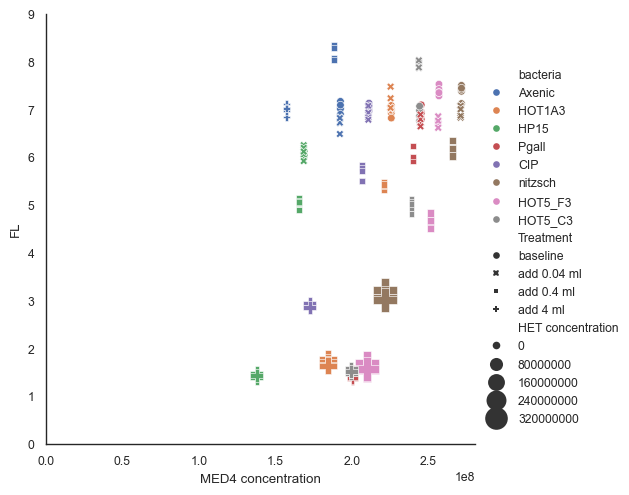

In [99]:
sns.relplot(
    data=df,
    x='MED4 concentration',
    y='FL',
    style='Treatment',
    hue='bacteria',
    size='HET concentration',
    sizes=(30,300),
).set(ylim=(0,9), xlim=(0,2.8e8))
    


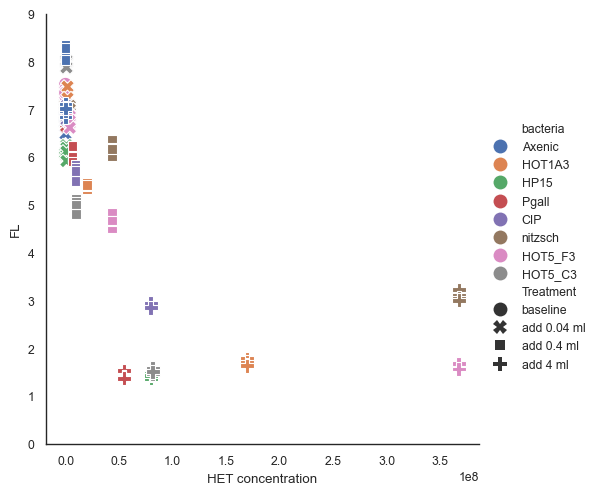

In [109]:
sns.relplot(
    data=df,
    #size='MED4 concentration',
    y='FL',
    style='Treatment',
    hue='bacteria',
    x='HET concentration',
    s=100,
    sizes=(30,300),
).set(ylim=(0,9)) #, xlim=(-1e7,2e8))
    


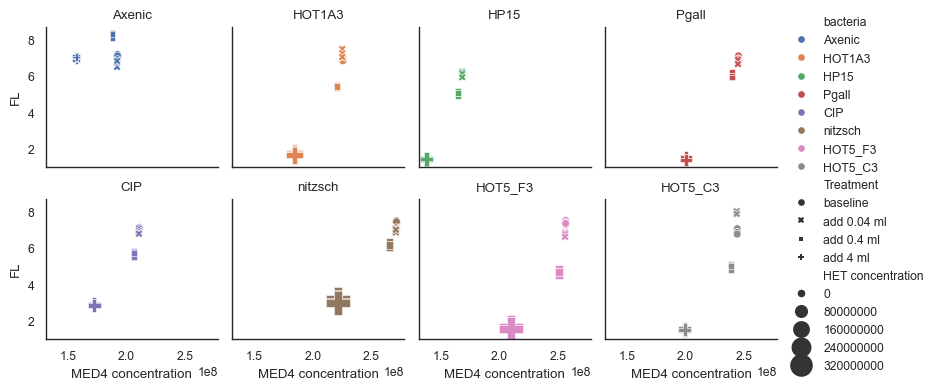

In [107]:
sns.relplot(
    data=df,
    x='MED4 concentration',
    y='FL',
    style='Treatment',
    hue='bacteria',
    size='HET concentration',
    col='bacteria', col_wrap=4,

    height=2,
    sizes=(30,300),
).set(ylim=(0,9), xlim=(0,2.8e8)
).set_titles(col_template='{col_name}')


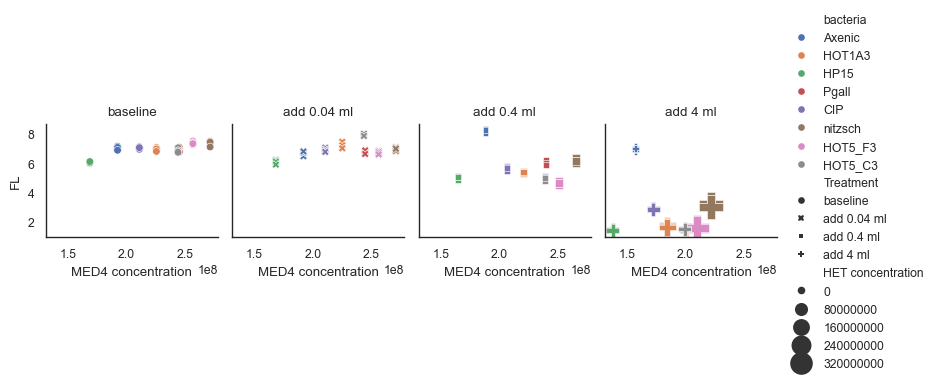

In [94]:
sns.relplot(
    data=df,
    x='MED4 concentration',
    y='FL',
    style='Treatment',
    hue='bacteria',
    size='HET concentration',
    col='Treatment', 

    height=2,
    sizes=(30,300)
).set_titles(col_template='{col_name}')

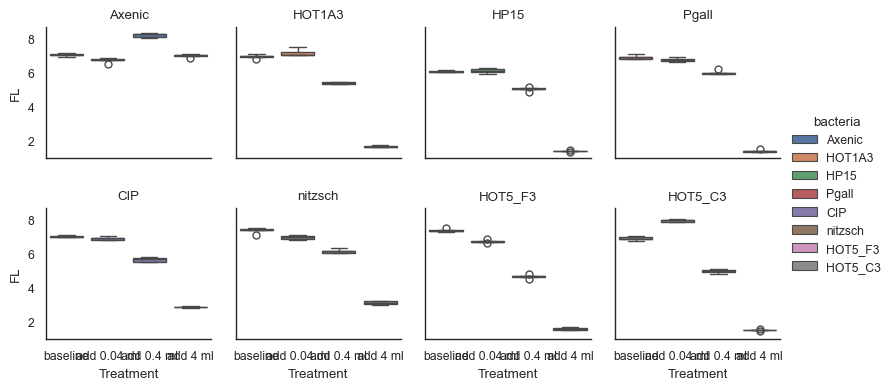

In [98]:
sns.catplot(
    data=df,
    x='Treatment',
    y='FL',
    hue='bacteria',
    col='bacteria', col_wrap=4,
    kind='box',
    height=2,
).set_titles(col_template='{col_name}')
